# The Horner Plot method

Heat **always** flows from hotter to colder parts. During a drilling process, the relatively cool drilling fluid *cools* the surrounding in the vicinity of the borehole. If temperatures are measured shortly after the drilling ended, they therefore likely underestimate the true rock temperature at that depth. Over time, the measured temperatures will increase, as temperature in the borehole re-equilibrates with the temperature of the surrounding rockmass.  

As it is usually not possible to wait for the temperatures to re-equilibrate, there exist correction methods for those measured *Bottom Hole Temperatures* (often abbreviated as *BHT*).

The Horner plot method is one correction method. It uses the behaviour of *in situ* temperature (and pressure) when disturbed by drilling. It plots the following linear equation: 

$$ T = T_\infty + \frac{Q}{4\pi\lambda} \times ln(1 + \frac{t_c}{\Delta t}) $$

where $T$ is the bottom-hole temperature [°C], $T_\infty$ is the 'virgin rock temperature' or *in-situ* temperature [°C], $Q$ the heat flow per unit length [W/m], $\lambda$ the thermal conductivity of the rock [W/(m K)], $t_c$ the time between end of drilling and end of mud circulation and $\Delta t$ the time between end of mud circulation and measurement.  
This equation resembles a linear equation

$$ y = b + m \times x $$

where $ln(1 + \frac{t_c}{\Delta t})$ equals $x$ and $T$ equals $y$.  
Now if we have temperature measurements at different times $\Delta t$, we can assess the *in-situ* temperature by linear regression.  

Assume we have three temperatures measured at three different times at a depth of 1500 m:  
* $\Delta t_1$ = 10 h, T = 53 °C  
* $\Delta t_2$ = 15.5 h, T = 56.5 °C  
* $\Delta t_3$ = 20.5 h, T = 58.5 °C  


In [14]:
# import some libraries  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# Set up the variables
tc = 3.  
Dt = np.array([10., 15.5, 24.5])#.reshape(3,1)
T = np.array([53., 56.5, 59.8])#.reshape(3,1) # the y values in the linear equation

# calculate x values for the linear equation
x = np.log(1 + (tc/Dt))

Now that we know x ($ln(1 + \frac{t_c}{\Delta t})$) and y ($T$) values, we can do a linear regression to get $m$ and $b$ of the linear equation

In [54]:
# linear regression  
m,b = np.polyfit(x,T,1)

# set up a regression line
x_reg = np.linspace(0,0.3,200)
T_reg = m * x_reg + b

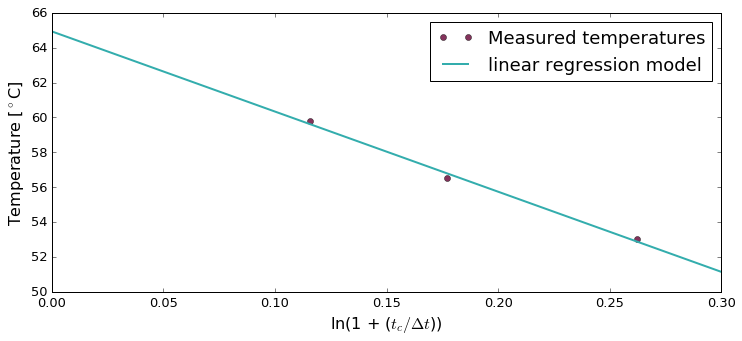

In [57]:
# plot the results
fig = plt.figure(figsize=(12,5))
dots, = plt.plot(x,T,'o', color='#660033', alpha=0.8)
line, = plt.plot(x_reg,T_reg, '-', linewidth=2, color='#33ADAD')
plt.xlabel('ln(1 + ($t_c/\Delta t$))', fontsize=16)
plt.ylabel('Temperature [$^\circ$C]', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend([dots,line], ["Measured temperatures", "linear regression model"], loc=1, fontsize=18)

We know that the slope $m$ equals $\frac{Q}{4\pi \lambda}$. If the mean thermal conductivity of the rocks equals 2.24 W m$^{-1}$ K$^{-1}$, we can calculate Q.   

In [69]:
tc = 2.24
Q = 4*np.pi*tc*m
print("The heat flow per unit length Q is {} W/m (negative sign means flow into the borehole).".format(Q))

The heat flow per unit length Q is -1293.98727063 W/m (negative sign means flow into the borehole).
